# **🌱 EPOCH 비기너 세션 3주차 복습문제**



---



## **1️⃣ 다음 직원별 근무시간 데이터를 생성하고, 몇 가지 분석을 수행하세요.**
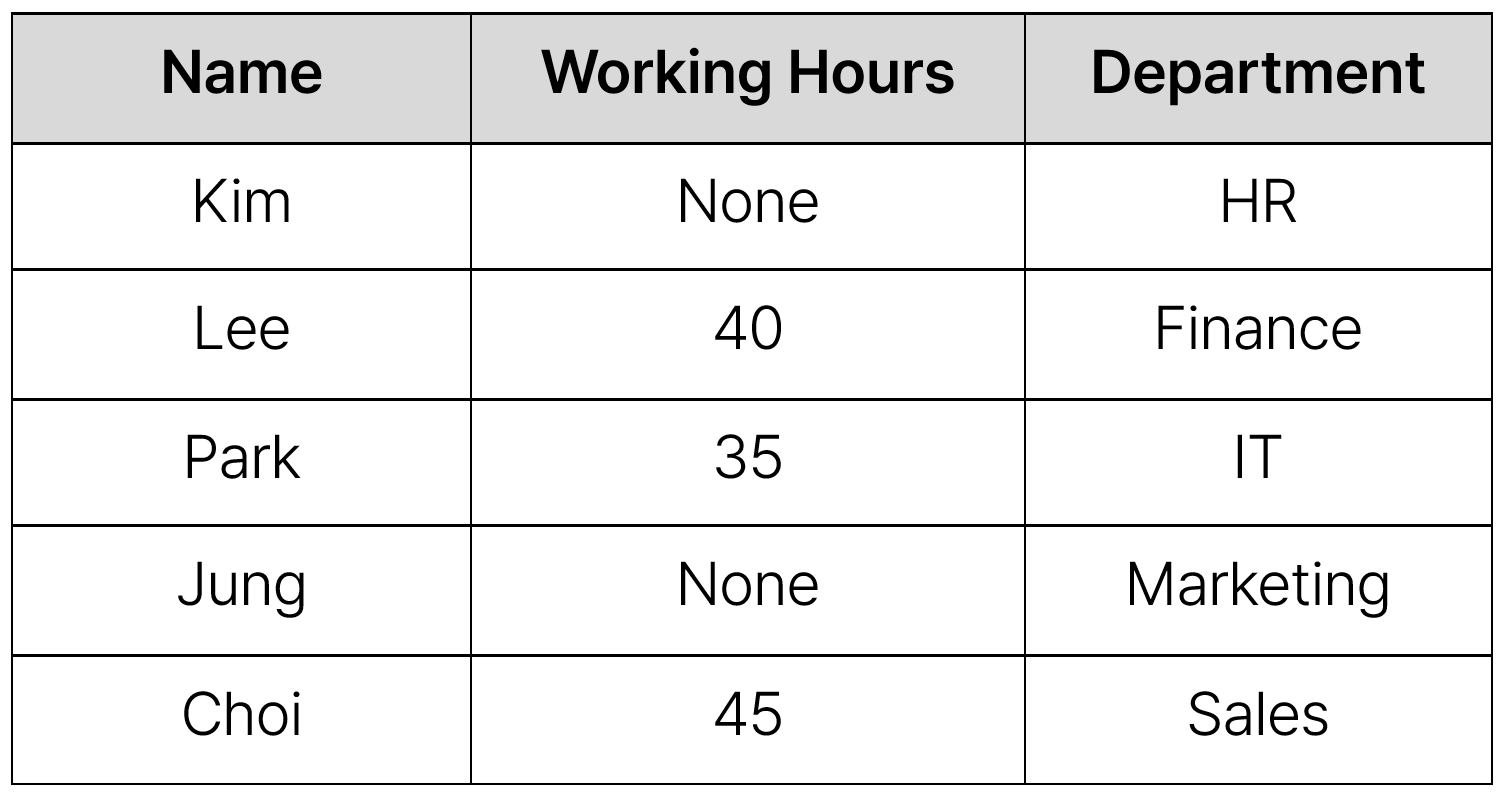

### (0) 데이터를 생성하세요.

In [8]:
from pandas import DataFrame
data= [
    ["Kim", "None", "HR"],
    ["Lee", 40, "Finance"],
    ["Park", 35, "IT"],
    ["Jung", "None", "Marketing"],
    ["Choi", 45, "Sales"]
]
columns = ["Name","Working Hours","Department"]
df= DataFrame(data=data, columns=columns)
df.set_index("Name", inplace=True)
df

,Working Hours,Department
Name,,
Kim,None,HR
Lee,40,Finance
Park,35,IT
Jung,None,Marketing
Choi,45,Sales


### (1) 결측값을 평균 근무시간으로 채우세요.

In [12]:
import pandas as pd
mean_hours = df["Working Hours"].mean()
df["Working Hours"] = df["Working Hours"].fillna(mean_hours)
print(df)

      Working Hours Department
Name                          
Kim            40.0         HR
Lee            40.0    Finance
Park           35.0         IT
Jung           40.0  Marketing
Choi           45.0      Sales


### (2) 근무시간이 40시간 미만인 직원의 이름과 부서를 출력하세요.

In [17]:
under = df[df["Working Hours"] < 40]
print(under_40_hours[["Department"]])

     Department
Name           
Park         IT


### (3) 근무시간 컬럼의 값을 10% 증가시키세요.

In [18]:
df["Working Hours"] = df["Working Hours"] * 1.1
print(df)

      Working Hours Department
Name                          
Kim            44.0         HR
Lee            44.0    Finance
Park           38.5         IT
Jung           44.0  Marketing
Choi           49.5      Sales


### (4) 직원명을 기준으로 데이터를 오름차순 정렬하세요.

In [20]:
sort = df.sort_values(by= "Name")
print(sort)

      Working Hours Department
Name                          
Choi           49.5      Sales
Jung           44.0  Marketing
Kim            44.0         HR
Lee            44.0    Finance
Park           38.5         IT


### (5) 'Sales' 부서에 속한 직원의 근무시간을 5% 증가시키세요.

In [24]:
sort.loc[df["Department"] == "Sales", "Working Hours"] = sort.loc[df["Department"] == "Sales", "Working Hours"] * 1.05
print(sort)

      Working Hours Department
Name                          
Choi         51.975      Sales
Jung         44.000  Marketing
Kim          44.000         HR
Lee          44.000    Finance
Park         38.500         IT


## **2️⃣ ‘students1_data.csv’ 파일과 ‘students2_data.csv’ 파일을 불러와 학생 성적 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [30]:
data2= pd.read_csv("students2_data.csv")
data3= pd.read_csv("students1_data.csv")
data2.head()
data3.head()

,StudentID,Name,GradeLevel
0,1,Student_1,4
1,2,Student_2,3
2,3,Student_3,4
3,4,Student_4,4
4,5,Student_5,1


### (1) 두 데이터프레임을 ‘StudentID’를 기준으로 병합하세요.

In [31]:
data= pd.merge(data2, data3, on= "StudentID")
data

,StudentID,Grade,Name,GradeLevel
0,1,68,Student_1,4
1,2,67,Student_2,3
2,3,79,Student_3,4
3,4,70,Student_4,4
4,5,52,Student_5,1
...,...,...,...,...
245,246,50,Student_246,1
246,247,90,Student_247,1
247,248,88,Student_248,2
248,249,75,Student_249,1


### (2) 성적이 95점 이상인 학생만 필터링하세요. 그리고 학년 기준 내림차순 정렬하고 학년이 같으면 'StudentID' 기준 오름차순 정렬하세요.

In [38]:
filtered = data[data["Grade"] >= 95]
print(filtered)
filtered = filtered.sort_values(by=["GradeLevel", "StudentID"], ascending=[False, True])
print(filtered)

     StudentID  Grade         Name  GradeLevel
28          29     96   Student_29           4
169        170     98  Student_170           4
244        245     96  Student_245           4
10          11     97   Student_11           3
50          51     96   Student_51           3
87          88     95   Student_88           3
91          92     99   Student_92           3
105        106     98  Student_106           3
140        141     99  Student_141           3
170        171     97  Student_171           3
172        173     95  Student_173           3
182        183     97  Student_183           3
196        197     99  Student_197           3
90          91     96   Student_91           2
134        135     95  Student_135           2
154        155     99  Student_155           2
161        162     98  Student_162           2
187        188     99  Student_188           2
212        213     95  Student_213           2
25          26     99   Student_26           1
100        10

### (3) (1)번 데이터에서 학년 별로 성적의 평균을 계산하세요.

In [40]:
data.groupby("GradeLevel")["Grade"].mean()

,Grade
GradeLevel,
1,71.320755
2,77.565217
3,72.561644
4,72.636364


### (4) 다음은 교수 평가를 수행한 학생들의 교수 평가 점수를 나타낸 데이터입니다. 다음 데이터를 활용하여 아직 교수 평가를 수행하지 않은 학생의 ID와 학년을 출력하세요.
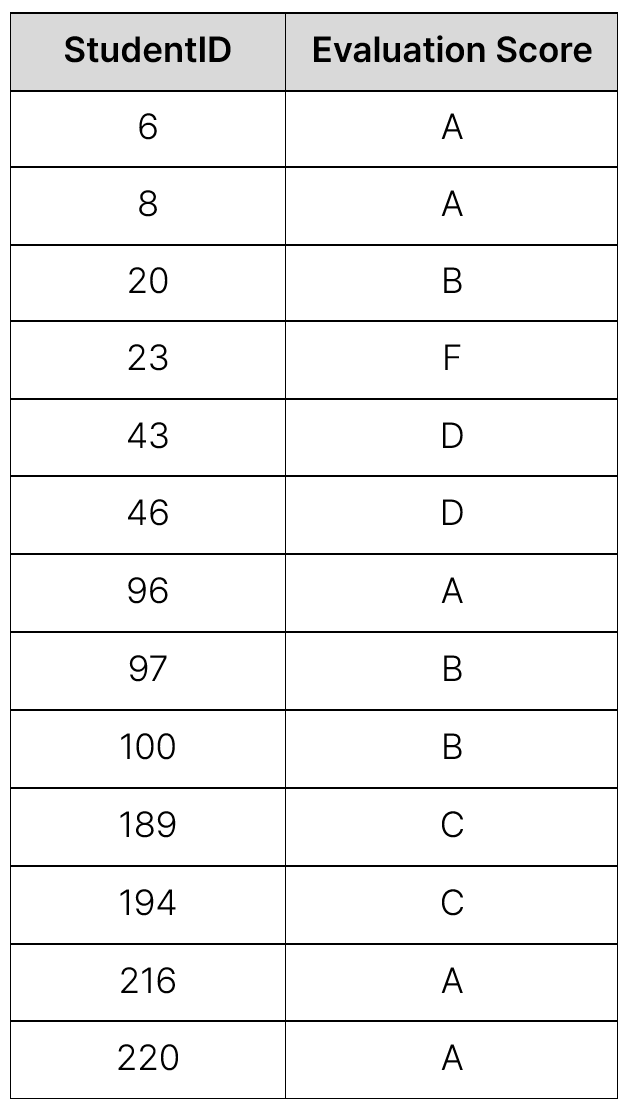

In [54]:
evaluated = {
    "StudentID": [6,8,20,23,43,46,96,97,100,189,194,216,220],
    "Evaluation Score": ["A","A","B","F","D","D","A","B","B","C","C","A","A"]
}
ev= pd.DataFrame(evaluated)
merged = data.merge(ev, on="StudentID", how="left")
not_evaluated = merged[merged["Evaluation Score"].isna()][["StudentID","GradeLevel"]]
not_evaluated

,StudentID,GradeLevel
0,1,4
1,2,3
2,3,4
3,4,4
4,5,1
...,...,...
245,246,1
246,247,1
247,248,2
248,249,1


### (5) 교수 평가를 수행하지 않은 학생은 학년 별로 총 몇 명인가요?

In [55]:
count = not_evaluated.groupby("GradeLevel")["StudentID"].count()
print(count)

GradeLevel
1    52
2    62
3    69
4    54
Name: StudentID, dtype: int64


## **3️⃣‘medical_records_data.csv’ 파일을 불러와 병원과 진료과목에 대한 환자 수 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [57]:
med= pd.read_csv("medical_records_data.csv")
med

,Hospital,Specialty,Patient_Count,Year
0,Seoul National University Hospital,Internal Medicine,540,2020
1,Seoul National University Hospital,Surgery,320,2020
2,Seoul National University Hospital,Pediatrics,220,2020
3,Seoul National University Hospital,Cardiology,170,2020
4,Seoul National University Hospital,Neurology,120,2020
...,...,...,...,...
135,Ewha Womans University Mokdong Hospital,Internal Medicine,640,2023
136,Ewha Womans University Mokdong Hospital,Surgery,360,2023
137,Ewha Womans University Mokdong Hospital,Pediatrics,280,2023
138,Ewha Womans University Mokdong Hospital,Cardiology,240,2023


### (1) 각 병원의 진료과목 별 총 환자 수를 계산하세요.

In [60]:
patients = med.groupby("Specialty")["Patient_Count"].sum()
patients

,Patient_Count
Specialty,
Cardiology,5960
Internal Medicine,16530
Neurology,4350
Pediatrics,7050
Surgery,9840


### (2) 2023년 진료 데이터를 기준으로 진료과목 별 환자 수가 가장 많은 병원을 찾으세요.

In [66]:
most= med[med['Year']==2023].sort_values(by= "Patient_Count").max()
most

,0
Hospital,Yonsei Severance Hospital
Specialty,Surgery
Patient_Count,660
Year,2023


### (3) 각 병원에서 2020년과 2023년 사이의 환자 수 증가율을 계산하고, 증가율이 가장 높은 병원을 찾으세요.

In [72]:
pivot = med.pivot_table(index="Hospital", columns="Year", values="Patient_Count")
pivot["증가율"] = (pivot[2023] - pivot[2020]) / pivot[2020] * 100
max_hos = pivot["증가율"].idxmax()
max_hos

'Ewha Womans University Mokdong Hospital'